<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Mufti !

Perkenalkan saya Dipta, disini saya akan mereview tugas Mufti ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-warning">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Mufti dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# Konten <a id='back'></a>

* [Pendahuluan](#Pendahuluan)
* [Langkah 1 : Membaca Data dan Informasi Umum](#langkah1)
* [Langkah 2 : Split Data Source](#langkah2)
* [Langkah 3 : Periksa Kualitas Model yang Berbeda](#langkah3)
* [Langkah 4 : Periksa kualitas model dengan menggunakan test set](#langkah4)
* [Langkah 5 : Sanity Check terhadap model](#langkah5)
* [Kesimpulan Umum](#kesimpulan_umum)
</a>

# Pendahuluan <a id='Pendahuluan'></a>

Operator seluler Megaline merasa tidak puas karena banyak pelanggan mereka yang masih menggunakan paket lama. Perusahaan tersebut ingin mengembangkan sebuah model yang dapat menganalisis perilaku konsumen dan merekomendasikan salah satu dari kedua paket terbaru Megaline: Smart atau Ultra.

Anda memiliki akses terhadap data perilaku para pelanggan yang sudah beralih ke paket terbaru (dari proyek kursus Analisis Data Statistik). Dalam tugas klasifikasi ini, Anda perlu mengembangkan sebuah model yang mampu memilih paket dengan tepat. Mengingat Anda telah menyelesaikan langkah pra-pemrosesan data, Anda bisa langsung menuju ke tahap pembuatan model.
Kembangkanlah sebuah model yang memiliki accuracy setinggi mungkin. Pada proyek ini, ambang batas untuk tingkat accuracy-nya adalah 0,75. Periksalah metrik accuracy model Anda dengan menggunakan test dataset.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# Langkah 1 : Membaca Data dan Informasi Umum <a id='langkah1'></a>

In [17]:
#Mengimport library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

In [18]:
#Membaca Data
df = pd.read_csv('/datasets/users_behavior.csv')

In [19]:
#Informasi Umum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [20]:
#Cek nilai duplikat
df.duplicated().sum()

0

In [21]:
#Cek nilai null
df.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [22]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [23]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [24]:
df.shape

(3214, 5)

# Kesimpulan Sementara<a id='kesimpulan_sementara1'></a>

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
Dari langkah diatas dan pembacaan data yang diambil dari file '/datasets/users_behavior.csv', diketahui file tersebut berjumlah 5 kolom dan 3214 baris. Tidak ada nilai duplikat maupun nilai null karena pada projek sebelumnya sudah dilakukan preprocessing data. Langkah selanjutnya adalah split data source menjadi 3 bagian yaitu data train, data test, dan data valid guna melakukan modelling.
</div>

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# Langkah 2 : Split data source menjadi training set, validation set, dan test set <a id='langkah2'></a>

In [25]:
#Split data source menjadi training dan testing dengan perbandingan 80 : 20 
df_train, df_test = train_test_split(df, test_size=0.20, random_state=12345)

In [10]:
#Split data train menjadi training dan validation dengan perbandingan 80 : 20
df_train, df_valid = train_test_split(df_train, test_size=0.25, random_state=12345)# 0.25 * 0.80 = 0.20  untuk validasi test

In [11]:
#Mengecek ukuran apakah benar sudah 80:20:20 atau 3:1:1
df_train.shape, df_test.shape, df_valid.shape

((1928, 5), (643, 5), (643, 5))

In [12]:
df_train.shape[0] * 100 / df.shape[0], df_test.shape[0] * 100 / df.shape[0], df_valid.shape[0] * 100 / df.shape[0]

(59.98755444928438, 20.00622277535781, 20.00622277535781)

In [13]:
#Menentukan Feature(x) dan Target(y)
feature_xtrain = df_train.drop(['is_ultra'], axis=1)
target_ytrain = df_train['is_ultra']

feature_xtest = df_test.drop(['is_ultra'], axis=1)
target_ytest = df_test['is_ultra']

feature_xvalid = df_valid.drop(['is_ultra'], axis=1)
target_yvalid = df_valid['is_ultra']

In [14]:
for ukuran in [feature_xtrain, target_ytrain, feature_xtest, target_ytest, feature_xvalid, target_yvalid]:
    print(ukuran.shape)

(1928, 4)
(1928,)
(643, 4)
(643,)
(643, 4)
(643,)


# Kesimpulan Sementara<a id='kesimpulan_sementara2'></a>

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
Data source telah di split menjadi 3 bagian yaitu df_train, df_test, dan df_valid dengan masing" proporsi 3:1:1 atau 60%:20%:20%. Selain itu mementukan prediksi target yaitu "is_ultra", dimana 1 adalah is_ultra dan 0 berarti bukan "is_ultra" melainkan paket "smart". Juga menentukan fitur pada tiga dataset tersebut.

</div>

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# Langkah 3 : Periksa kualitas model yang berbeda <a id='langkah3'></a>

In [18]:
#Pengembangan Model
#Di bagian ini kita akan mengembangkan beberapa model. Karena projek ini adalah klasifikasi, makan kita akan mengembangkan model dengan decision tree classifier, random forest, dan logistic regression.

# Decision Tree Classifier

max_depth = 1 : 
training_set_acc= 0.758
valid_set_acc= 0.739

max_depth = 2 : 
training_set_acc= 0.792
valid_set_acc= 0.757

max_depth = 3 : 
training_set_acc= 0.812
valid_set_acc= 0.765

max_depth = 4 : 
training_set_acc= 0.821
valid_set_acc= 0.764

max_depth = 5 : 
training_set_acc= 0.827
valid_set_acc= 0.759

max_depth = 6 : 
training_set_acc= 0.834
valid_set_acc= 0.757

max_depth = 7 : 
training_set_acc= 0.851
valid_set_acc= 0.774

max_depth = 8 : 
training_set_acc= 0.866
valid_set_acc= 0.767

max_depth = 9 : 
training_set_acc= 0.875
valid_set_acc= 0.762

max_depth = 10 : 
training_set_acc= 0.891
valid_set_acc= 0.771



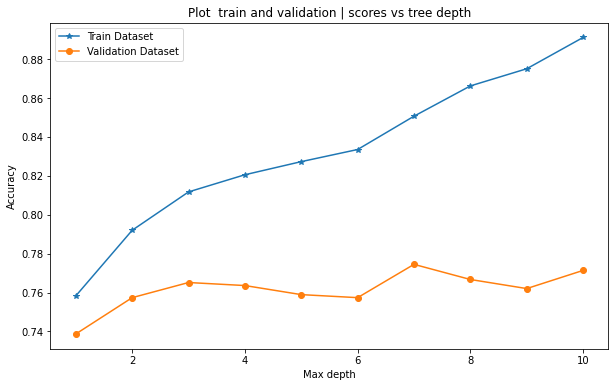

In [19]:
#Decision Tree Classifier

#list untuk skor plot
train_scores = []
valid_scores = []

for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state = 12345, max_depth=depth)
    model.fit(feature_xtrain, target_ytrain)
    #Membuat accuracy_score di datasate train
    prediction_train = model.predict(feature_xtrain)
    acc_train = accuracy_score(target_ytrain, prediction_train)
    train_scores.append(acc_train)
    #Membuat accuracy_score di dataset valid
    prediction_valid = model.predict(feature_xvalid)
    acc_valid = accuracy_score(target_yvalid, prediction_valid)
    valid_scores.append(acc_valid)
    print('max_depth =', depth, ': ')
    print('training_set_acc= {:.3f}'.format(acc_train))
    print('valid_set_acc= {:.3f}'.format(acc_valid))
    print()
#Membuat plot untuk membandingkan dataset overfitting / underfitting
depth = [i for i in range(1, 11)]
plt.figure(figsize=(10,6))
plt.plot(depth, train_scores, '-*', label='Train Dataset')
plt.plot(depth, valid_scores, '-o', label='Validation Dataset')
plt.title('Plot  train and validation | scores vs tree depth')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# Random Forest Classifier

n_estimator = 1 : 
training_set_acc= 0.902
valid_set_acc= 0.703

n_estimator = 2 : 
training_set_acc= 0.910
valid_set_acc= 0.757

n_estimator = 3 : 
training_set_acc= 0.959
valid_set_acc= 0.745

n_estimator = 4 : 
training_set_acc= 0.948
valid_set_acc= 0.765

n_estimator = 5 : 
training_set_acc= 0.971
valid_set_acc= 0.762

n_estimator = 6 : 
training_set_acc= 0.965
valid_set_acc= 0.770

n_estimator = 7 : 
training_set_acc= 0.979
valid_set_acc= 0.771

n_estimator = 8 : 
training_set_acc= 0.972
valid_set_acc= 0.787

n_estimator = 9 : 
training_set_acc= 0.982
valid_set_acc= 0.784

n_estimator = 10 : 
training_set_acc= 0.980
valid_set_acc= 0.788



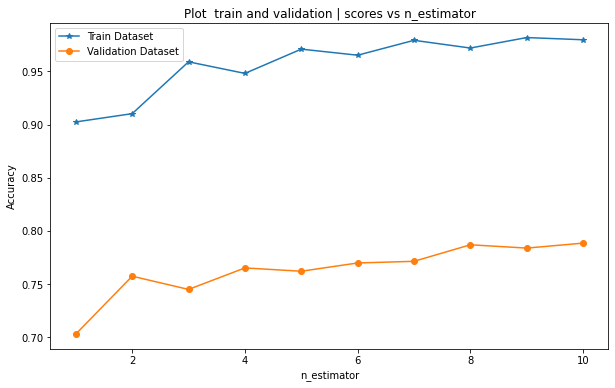

Accuracy model terbaik pada validation set (n_estimators = 10): 0.7884914463452566


In [21]:
#Random Forest Classifier

#list untuk skor plot
train_scores = []
valid_scores = []

#List untuk mencari skor valid terbaik
best_valid_scores = 0
best_est = 0

for est in range(1, 11):
    model = RandomForestClassifier(random_state = 12345, n_estimators=est)
    model.fit(feature_xtrain, target_ytrain)
    #Membuat score di datasate train
    #prediction_train = model.predict(feature_xtrain)
    #acc_train = accuracy_score(target_ytrain, prediction_train)
    acc_train = model.score(feature_xtrain, target_ytrain)
    train_scores.append(acc_train)
    #Membuat score di dataset valid
    #prediction_valid = model.predict(feature_xvalid)
    #acc_valid = accuracy_score(target_yvalid, prediction_valid)
    acc_valid = model.score(feature_xvalid, target_yvalid)
    valid_scores.append(acc_valid)
    #Mencari best valid score
    if acc_valid > best_valid_scores:
        best_valid_score = acc_valid
        best_est = est
    print('n_estimator =', est, ': ')
    print('training_set_acc= {:.3f}'.format(acc_train))
    print('valid_set_acc= {:.3f}'.format(acc_valid))
    print()
#Membuat plot untuk membandingkan dataset overfitting / underfitting
est = [i for i in range(1, 11)]
plt.figure(figsize=(10,6))
plt.plot(est, train_scores, '-*', label='Train Dataset')
plt.plot(est, valid_scores, '-o', label='Validation Dataset')
plt.title('Plot  train and validation | scores vs n_estimator')
plt.xlabel('n_estimator')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print("Accuracy model terbaik pada validation set (n_estimators = {}): {}".format(best_est, best_valid_score))

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# Logistic Regression

In [23]:
#Regresi logistik

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(feature_xtrain, target_ytrain)
score_train = model.score(feature_xtrain, target_ytrain)
score_valid = model.score(feature_xvalid, target_yvalid)

print("Accuracy model regresi logistik berdasarkan training set:", score_train)
print("Accuracy model regresi logistik berdasarkan validation set:", score_valid)


Accuracy model regresi logistik berdasarkan training set: 0.7422199170124482
Accuracy model regresi logistik berdasarkan validation set: 0.7293934681181959


<div style="background-color:rgba(0, 255, 172, 0.07)"
     
Berikut beberapa informasi yang didapat dari 3 pengembangan model diatas :

*Decision Tree Classifier
- Ditentukan random_state = 12345
- Melakukan 10 iterasi (max_depth) untuk membandingkan kualitas model train dan model valid
- Paling tinggi score_accuracy ada di depth 7 dengan nilai 0.774 untuk data valid, diatas sedikit ambang batas projek ini untuk tingkat accuracy-nya adalah 0.75
- Dari plot bisa dilihat semakin tinggi max_depth, score_accuracy data train semakin tinggi. Namun tidak dengan data valid, score_accuracy-nya selalu sekitar 0.7
- Hal ini berarti akan terjadi overfitting dengan melakukan model decission tree classifier

*Random Forest Classifier
- Ditentukan random_state = 12345
- Melakukan 10 iterasi (n_estimators) untuk membandingkan kualitas model train dan model valid
- Paling tinggi score ada di n_estimators = 10 dengan score 0.788
- Dari plot bisa dilihat score data train selalu di sekitar 0.9 dan data valid selalu di sekitar 0.7
- Hal ini berarti random forrest classifier lebik baik dari decission tree classifier

*Logistic Regression
- Ditentukan random_state = 12345 dan solver='liblinear'
- Score model regresi logistik berdasarkan data train adalah 0.74 dan data valid adalah 0.72
- Score model logistic regression dibawah ambang batas projek ini yang 0.75.
- Hal ini berarti random forrest classifier lebik baik dari decission tree classifier dan logistic regression

     Langkah selanjutnya adalah memeriksa kualitas model dengan menggunakan test set.
</div>

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# Langkah 4 : Periksa kualitas model dengan menggunakan test set <a id='langkah4'></a>

In [41]:
#Dari pengembangan model sebelumnya, random forest classifier adalah yang paling akurat. Dengan  model ini sebagai model final, kita melakukan prediksi dengan menggunakan data test.

In [26]:
#Check Model Quality dengan test dataset
model = RandomForestClassifier(random_state = 12345, n_estimators=10)
model.fit(feature_xtrain, target_ytrain)
acc_train = model.score(feature_xtrain, target_ytrain)
acc_valid = model.score(feature_xvalid, target_yvalid)
acc_test = model.score(feature_xtest, target_ytest)
print('valid_set_acc= {:.3f}'.format(acc_valid))
print('test_set_acc= {:.3f}'.format(acc_test))

valid_set_acc= 0.788
test_set_acc= 0.787


<div style="background-color:rgba(0, 255, 172, 0.07)"
     
Score data test tidak jauh berbeda dengan score data valid

</div>

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# Langkah 5 : Sanity Check terhadap model <a id='langkah5'></a>

In [35]:
#Sanity check the model
model = RandomForestClassifier(random_state = 12345)
model.fit(feature_xtrain, target_ytrain)
prediction_valid = model.predict(feature_xvalid)

print(classification_report(target_yvalid, prediction_valid))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       443
           1       0.72      0.55      0.63       200

    accuracy                           0.79       643
   macro avg       0.77      0.73      0.74       643
weighted avg       0.79      0.79      0.79       643



<div style="background-color:rgba(0, 255, 172, 0.07)"
     
- Semakin kecil False Positive (FP), membuat precision semakin besar. Sedangkan untuk recall, semakin kecil False Negative (FN) membuat recall semakin besar
- Terjadi trade off antara precision recall dimana ketika Recall sangat tinggi maka Precision akan sangat rendah, begitu juga sebaliknya
- Hal diatas bisa dilihat precision 0.7, sedangkan recall 0.5

</div>

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# Kesimpulan Umum <a id='kesimpulan_umum'></a>

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
- Dari langkah diatas dan pembacaan data yang diambil dari file '/datasets/users_behavior.csv', diketahui file tersebut berjumlah 5 kolom dan 3214 baris
- Data source telah di split menjadi 3 bagian yaitu df_train, df_test, dan df_valid dengan masing" proporsi 3:1:1 atau 60%:20%:20%
- Model Random forrest classifier lebik baik daripada decission tree classifier dan logistic regression untuk projek ini dengan skor 0.788
- Score data test tidak jauh berbeda dengan score data valid
- Ambang batas untuk tingkat akurasi pada projek ini adalah 0.75. Dengan model final kita mendapatkan score 0.788 artinya dengan model ini kita benar 78% untuk prediksi paket yang tepat untuk pelanggan

</div>

<div class="alert alert-block alert-success">

# General comments #1
<b>Reviewer's comment</b> <a class="tocSkip"></a> 

Good Job Mufti! Sebagian besar kamu telah menyelesaikan project ini dengan baik dan tanpa revisi ya!
    

</div>